# D212 Data Mining II Performance Assessment, Task \# 2

Submitted by Ubaldo Martinez III, Principal Component Analysis, Master of Science, Data Analytics, WGU

## Table of Contents
<ul>
<li><a href="#PartA1">A1: Research Question</a></li>
<li><a href="#PartA2">A2: Objectives & Goals</a></li>
<li><a href="#PartB1">B1: Technique of PCA</a></li>
<li><a href="#PartB2">B2: Assumptions of PCA</a></li>
<li><a href="#PartC1">C1: Selection of Continuous Variables</a></li>
<li><a href="#PartC2">C2: Standardization of Variables</a></li>
<li><a href="#PartD1">D1: Principle Component Matrix</a></li>
<li><a href="#PartD2">D2: Elbow Rule</a></li>
<li><a href="#PartD3">D3: Principle Component Variance</a></li>
<li><a href="#PartD4">D4: Total Principle Component Variance</a></li>
<li><a href="#PartD5">D5: Summary of PCA Analysis</a></li>
<li><a href="#PartE">E: Third-Party Code</a></li> 
<li><a href="#PartF">F: Sources</a></li>  
</ul>

# Part I: Research Question

<a id='PartA1'></a>
## <span style="color:green">A1: Research Question</span>

This analysis aims to investigate whether principal component analysis (PCA) can help in effectively predicting churn customers using a decision tree classifier by reducing the dimensionality of the dataset. 

<a id="#PartA2"></a>
## <span style="color:green">A2: Objectives & Goals</span>

Perform PCA on the dataset to decrease dimensionality and assess the importance of each principal component by retaining maximum variance. Use the reduced dataset generated by PCA to construct a decision tree classifier and evaluate its effectiveness in forecasting churn clients. These two goals will enable the telecommunications firm to understand its customer base's features and enhance its product offerings and marketing campaigns to satisfy their needs and preferences.

# Part II: Method Justification

<a id="#PartB1"></a>
## <span style="color:green">B1: Technique of PCA</span>

PCA analyzes the selected data set by first standardizing the data to ensure that each variable has a mean of 0 and a standard deviation of 1. This is done to prevent variables with larger magnitudes from dominating the analysis.

Then, PCA calculates the covariance matrix of the standardized data set. The covariance matrix shows the relationships between each pair of variables and how they vary together.

Next, PCA identifies the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors are the directions in which the data varies the most, while eigenvalues represent the amount of variation in the data explained by each eigenvector. The eigenvectors with the highest eigenvalues are the most important and are used to create the principal components.

Finally, PCA transforms the original data into the new principal components by multiplying the standardized data by the eigenvectors. The first principal component captures the largest amount of variation in the data, and each subsequent component captures the remaining variation in decreasing order.

The expected outcome of PCA is a set of new variables, the principal components, that capture the most important patterns in the original data set.

<a id="#PartB2"></a>
## <span style="color:green">B2: Assumptions of PCA</span>

One important assumption of PCA is for all variables to be continuous and numerical. It is possible to convert categorical variables into binary variables, but using PCA as a linear method may not fully capture the complexity of the data when the categorical variables have numerous levels or when there are non-linear relationships among the variables. Once the final continuous and numerical variables are selected, they must be standardized with a mean of 0 and standard deviation of 1.

# Part III: Data Preparation

<a id="#PartC1"></a>
## <span style="color:green">C1: Selection of Continuous Variables</span>

PCA analysis will utilize 9 quantitative variables from the churn dataset:
<br>

<ul class="a">
<li><b>Children</b></li>
<li><b>Age</b></li>
<li><b>Income</b></li> 
<li><b>Outage_Sec_Wk</b></li>
<li><b>Email</b></li> 
<li><b>Contacts</b></li> 
<li><b>Yr_Equip_Failure</b></li>
<li><b>Tenure</b></li> 
<li><b>MonthlyCharge</b></li> 
<li><b>Bandwidth_Yr</b></li> 
</ul>

Population, Latitude & Longitude continuous variables were left out as it has no relation to a customers services or characteristics.


<a id="#PartC2"></a>
## <span style="color:green">C2: Standardization of Variables</span>

### Import & Configure Packages

In [14]:
# Pandas
import logging
import pandas as pd
from pandas.api.types import CategoricalDtype

# Scientific Computing
import numpy as np

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score 
from sklearn.tree import export_graphviz as dt # decisiontree

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Arial, sans-serif'
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("dark_background")

# Warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
logging.getLogger('matplotlib.font_manager').disabled = True
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

# Misc
from IPython.display import display
from decimal import Decimal, ROUND_DOWN



### Import Dataset

In [15]:
# Import Original Churn Dataset Then Display Shape
df_o = pd.read_csv('Data/churn_clean.csv', index_col=0)
df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

### Display Dataset

In [16]:
pd.set_option("display.max_columns", None)
df_o.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


### Data Preprocessing

In [17]:


# Convert From Float To Int
df_o["Income"] = df_o["Income"].astype(int)

# Convert From Yes/No To True/False
bool_mapping = {"Yes" : True, "No" : False}
# Convert From Boolean To String
df_o["Churn"] = df_o["Churn"].map(bool_mapping)
# Reformat From 6 Decimals Places To 3
df_o["Outage_sec_perweek"] = df_o.Outage_sec_perweek.round(3)

# Reformat From 6 Decimals Places To 3
df_o["Tenure"] = df_o.Tenure.round(3)
# Reformat From 6 Decimals Places To 3
df_o["MonthlyCharge"] = df_o.MonthlyCharge.round(3)
# Reformat From 6 Decimals Places To 3
df_o["Bandwidth_GB_Year"] = df_o.Bandwidth_GB_Year.round(3)

# Generate Names For Columns To Be Consistent & Descriptive
renamed_columns = ["customer_id", "interaction", "uid", "city", "state", "county", 
                    "zip_code", "latitude", "longitude", "population", "area_type", "timezone", "job", "children", 
                    "age", "income", "marital_status", "gender", "churn", "outage_sec_wk", "email", "contacts", 
                    "yr_equip_failure", "techie", "contract", "port_modem", "tablet", "internet_service", "phone", 
                    "multiple", "online_security", "online_backup", "device_protection", "tech_support", "streaming_tv", 
                    "streaming_movies", "paperless_billing", "payment_method", "tenure", "monthly_charge", "bandwidth_yr", 
                    "sur1_response", "sur2_fixes", "sur3_replacement", "sur4_reliable", "sur5_options", "sur6_respect", 
                    "sur7_courteous", "sur8_listen"]

# Implement new pythonic column headings
df_o.set_axis(renamed_columns, axis=1, inplace=True)

# Visually inspect DF for appropriate appearance and values
df_o.head()

,customer_id,interaction,uid,city,state,county,zip_code,latitude,longitude,population,area_type,timezone,job,children,age,income,marital_status,gender,churn,outage_sec_wk,email,contacts,yr_equip_failure,techie,contract,port_modem,tablet,internet_service,phone,multiple,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,payment_method,tenure,monthly_charge,bandwidth_yr,sur1_response,sur2_fixes,sur3_replacement,sur4_reliable,sur5_options,sur6_respect,sur7_courteous,sur8_listen
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561,Widowed,Male,False,7.978,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.796,172.456,904.536,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704,Married,Female,True,11.699,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.157,242.633,800.983,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609,Widowed,Female,False,10.753,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754,159.948,2054.707,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925,Married,Male,False,14.914,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087,119.957,2164.579,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074,Separated,Male,True,8.147,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.671,149.948,271.493,4,4,4,3,4,4,4,5


### Continuous Variables Dataset

In [18]:
# Create df_c Dataframe With Continuous Variables
df_c = df_o[["children", "age", "income", "outage_sec_wk", "email", 
        "contacts", "yr_equip_failure", "tenure", "monthly_charge", "bandwidth_yr"]].copy()

# Create List Of Column Headers
cols = list(df_c.columns)

# Set y For Churn Data Prediction
y = df_o["churn"]

### Standardize Continuous Variables

The process of standardization involves transforming and rescaling the features to have a mean of zero and a standard deviation of one. This is done to ensure that the covariances between each pair of features can be easily compared. If we do not standardize the data, features with wider ranges of values will exhibit higher covariances, making comparisons between them more difficult.

In [19]:
# Standardized, Fit To X & Transform
s = StandardScaler().fit_transform(df_o[["children", "age", "income", "outage_sec_wk", "email", 
        "contacts", "yr_equip_failure", "tenure", "monthly_charge", "bandwidth_yr"]].copy())

df_s = pd.DataFrame(s, columns=cols)

ss = []
# Mean and Standard Deviation For 10 Features
for column in cols:
        ss_dic = {}
        ss_dic['Column'] = column
        ss_dic['Mean'] = Decimal(str(df_s.loc[:,column].mean())).quantize(Decimal('1.00'), rounding=ROUND_DOWN)
        ss_dic['Std Dev'] = Decimal(str(df_s.loc[:,column].std())).quantize(Decimal('1.00'), rounding=ROUND_DOWN)
        ss.append(ss_dic)
d = pd.DataFrame(ss)
t = d.style.set_properties(**{'text-align': 'right'})
final = t.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'right')])])

display(final.hide_index())

Column,Mean,Std Dev
children,0.00,1.00
age,-0.00,1.00
income,0.00,1.00
outage_sec_wk,0.00,1.00
email,-0.00,1.00
contacts,-0.00,1.00
yr_equip_failure,-0.00,1.00
tenure,0.00,1.00
monthly_charge,-0.00,1.00
bandwidth_yr,0.00,1.00


### Covariance Matrix

In this step, the goal is to analyze the relationships between the continuous variables and how they deviate from their mean values. This is important to identify any correlations between the variables that may lead to redundant information. To detect these correlations, we calculate the covariance matrix.

In [20]:
# Function For Applying Colors To Indicate Highly Correlated Variables (Red = High Correlation)
def highlight_cells (val):
    if val > 0.9:
        color = 'red'
    elif val > 0.6:
        color = 'yellow'
    else:
        color = ''
    return f"background: {color}"

# Generate Covariance Matrix
covariance_matrix = pd.DataFrame.cov(df_s)

# Apply Function highlight_cells
covariance_matrix.style.applymap(highlight_cells)

,children,age,income,outage_sec_wk,email,contacts,yr_equip_failure,tenure,monthly_charge,bandwidth_yr
children,1.000100,-0.029735,0.009943,0.001887,0.004479,-0.020778,0.007321,-0.005092,-0.009782,0.025587
age,-0.029735,1.000100,-0.004091,-0.008047,0.001588,0.015069,0.008578,0.016981,0.010730,-0.014725
income,0.009943,-0.004091,1.000100,-0.010010,-0.009268,0.001233,0.005424,0.002115,-0.003014,0.003674
outage_sec_wk,0.001887,-0.008047,-0.010010,1.000100,0.003994,0.015094,0.002910,0.002931,0.020498,0.004175
email,0.004479,0.001588,-0.009268,0.003994,1.000100,0.003041,-0.016356,-0.014469,0.001997,-0.014581
contacts,-0.020778,0.015069,0.001233,0.015094,0.003041,1.000100,-0.006033,0.002820,0.004259,0.003299
yr_equip_failure,0.007321,0.008578,0.005424,0.002910,-0.016356,-0.006033,1.000100,0.012436,-0.007173,0.012035
tenure,-0.005092,0.016981,0.002115,0.002931,-0.014469,0.002820,0.012436,1.000100,-0.003337,0.991594
monthly_charge,-0.009782,0.010730,-0.003014,0.020498,0.001997,0.004259,-0.007173,-0.003337,1.000100,0.060412
bandwidth_yr,0.025587,-0.014725,0.003674,0.004175,-0.014581,0.003299,0.012035,0.991594,0.060412,1.000100


Covariance Matrix indicates tenure and bandwidth_yr being highly correlated (0.99 correlated) and providing the same information. To fix this redundancy, datasets were re-created, re-standardized and re-verified (means/standard deviation) without including the variable 'bandwidth_yr'. 

In [21]:
# Re-Create df_c and cols Without 'bandwidth_yr'
df_c = df_o[["children", "age", "income", "outage_sec_wk", "email", 
        "contacts", "yr_equip_failure", "tenure", "monthly_charge"]].copy()

cols = list(df_c.columns)

# Re-Standardized, Fit & Transform
s = StandardScaler().fit_transform(df_o[["children", "age", "income", "outage_sec_wk", "email", 
        "contacts", "yr_equip_failure", "tenure", "monthly_charge"]].copy())

df_s = pd.DataFrame(s, columns=cols)

ss = []
# Re-Verify Mean and Standard Deviation For 9 Features
for column in cols:
        ss_dic = {}
        ss_dic['Column'] = column
        ss_dic['Mean'] = Decimal(str(df_s.loc[:,column].mean())).quantize(Decimal('1.0'), rounding=ROUND_DOWN)
        ss_dic['Std Dev'] = Decimal(str(df_s.loc[:,column].std())).quantize(Decimal('1.0'), rounding=ROUND_DOWN)
        ss.append(ss_dic)
ss_d = pd.DataFrame(ss)
ss_d = ss_d.style.set_properties(**{'text-align': 'right'})
final = ss_d.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'right')])])

display(final.hide_index())

Column,Mean,Std Dev
children,0.0,1.0
age,-0.0,1.0
income,0.0,1.0
outage_sec_wk,0.0,1.0
email,-0.0,1.0
contacts,-0.0,1.0
yr_equip_failure,-0.0,1.0
tenure,0.0,1.0
monthly_charge,-0.0,1.0


### Export Copy of Prepared Dataset

In [22]:
# Export Prepared Data (Standardized) Set As A CSV File
df_s.to_csv('Data/task2_churn_prepared.csv', index=False)

# Part IV: Analysis

<a id="#PartD1"></a>
## <span style="color:green">D1: Principle Component Matrix</span>

The data has been standardized and is now ready to undergo dimensionality reduction using PCA. An instance of PCA object has been created and fit_transform() method has been applied to the data, combining both fitting and transforming steps in one, and the output has been stored in a variable named 'df_pca'. A table and heatmap are generated providing the same information of the weight each feature (left) contributes to each of the 9 principle components (top). 


In [23]:
# Instantiate PCA Object
pca = PCA(n_components = 9, random_state = 42)

# Fit PCA To Standardized Data & Transform
df_pca = pca.fit_transform(s)

# Generate PCA Maxtrix
df_pca_matrix = pd.DataFrame(pca.components_.T,
                              columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9"], 
                              index = cols)
round(df_pca_matrix,3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
children,0.561,-0.037,0.285,-0.015,0.104,0.309,-0.151,0.643,-0.246
age,-0.531,0.242,-0.241,-0.123,-0.147,0.395,0.075,0.202,-0.602
income,0.178,0.271,-0.000,0.817,-0.133,0.321,-0.079,-0.304,-0.083
outage_sec_wk,-0.182,-0.282,0.716,-0.007,0.229,-0.013,-0.009,-0.372,-0.429
email,-0.005,-0.497,-0.234,-0.142,0.238,0.708,-0.090,-0.228,0.246
contacts,-0.443,-0.099,0.039,0.452,0.560,-0.074,0.151,0.441,0.226
yr_equip_failure,0.042,0.492,0.340,-0.223,0.086,0.328,0.609,-0.073,0.316
tenure,-0.212,0.468,0.192,-0.178,0.187,0.099,-0.749,-0.035,0.248
monthly_charge,-0.308,-0.264,0.374,0.104,-0.696,0.146,-0.061,0.248,0.336


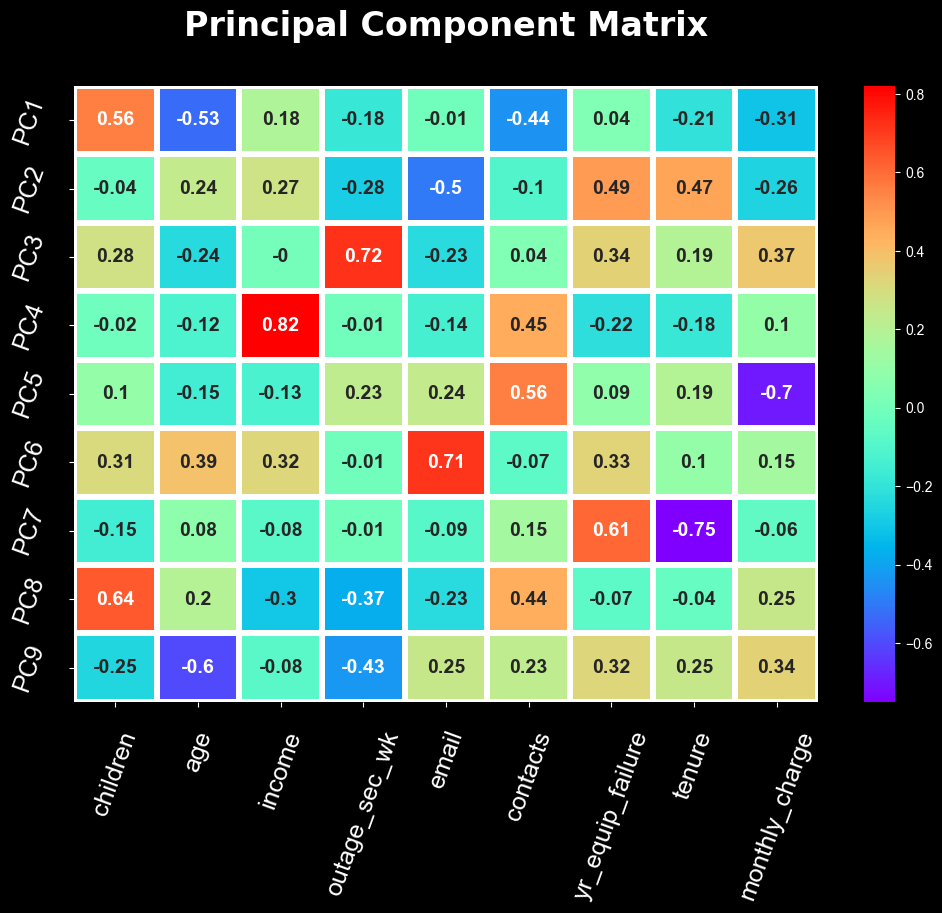

In [24]:
# Generate Visual Of Component Matrix
with plt.style.context(['dark_background']):
    pca_comp = pd.DataFrame(pca.components_.T,
        columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9"],
        index = cols)
    pca_comp_r = round(pca_comp,2)
    fig, ax = plt.subplots(figsize=(12,8))
    ax = sns.heatmap(
            pca_comp_r.T, square = False, annot = True, annot_kws={'size': 14, 'weight' : 'bold'}, 
            cmap='rainbow', linewidths=3, linecolor='white', fmt='g')
    plt.tick_params(axis='both', labelsize=18, pad=15, rotation=70)
    plt.title('Principal Component Matrix', family='Arial, sans-serif', fontweight='bold', fontsize=24, color='white', 
              y=1.05, pad=14, horizontalalignment='center')
    plt.xlabel("", fontfamily='Arial, sans-serif', fontsize=18, color='white', labelpad=20)
    plt.ylabel("", family='Arial, sans-serif', fontsize=18, color='white', labelpad=20)

        
    plt.show()

Based on the heatmap visual, PC1 is primarly influenced by children, age and contacts, PC2 by email, yr_equip_failure and tenure. PC3 and PC4 are heavily influenced by a single variable, indicated in red, outage_sec_wk for PC3 and income for PC4.

<a id="#PartD2"></a>
## <span style="color:green">D2: Elbow Rule</span>

To evaluate the significance of each principal component in explaining the variance in the data, two scree plots and a table were generated. These tools enabled the identification of principal components that had an insignificant impact and thus could be removed from the dataset.

In [25]:
# Generate Table For Contribution & Cumulative Percentage
pc_contributions = list(pca.explained_variance_ratio_)
pc_names = list(df_pca_matrix.columns)

pca_list = []
cumulative = 0

# Mean and Standard Deviation For 10 Features
for i in range(len(pc_names)):
        pca_dic = {}
        pca_dic['PC'] = pc_names[i]
        pca_dic['Contribution'] = pc_contributions[i] * 100
        pca_dic['Contribution %'] = Decimal(pca_dic['Contribution']).quantize(Decimal('1.00'), rounding=ROUND_DOWN)
        cumulative = pca_dic['Contribution %'] + cumulative
        pca_dic['Cumulative %'] = cumulative
        pca_list.append(pca_dic)
c = pd.DataFrame(pca_list, columns=['PC', 'Contribution %', 'Cumulative %'])
c = c.style.set_properties(**{'text-align': 'center'})
f_pca = c.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'center')])])

display(f_pca.hide_index())
print('9 Principal Components Explain {:.2f}% of Variance'.format(pca_dic['Cumulative %']))


PC,Contribution %,Cumulative %
PC1,11.72,11.72
PC2,11.53,23.25
PC3,11.28,34.53
PC4,11.11,45.64
PC5,11.04,56.68
PC6,10.98,67.66
PC7,10.94,78.60
PC8,10.71,89.31
PC9,10.64,99.95


9 Principal Components Explain 99.95% of Variance


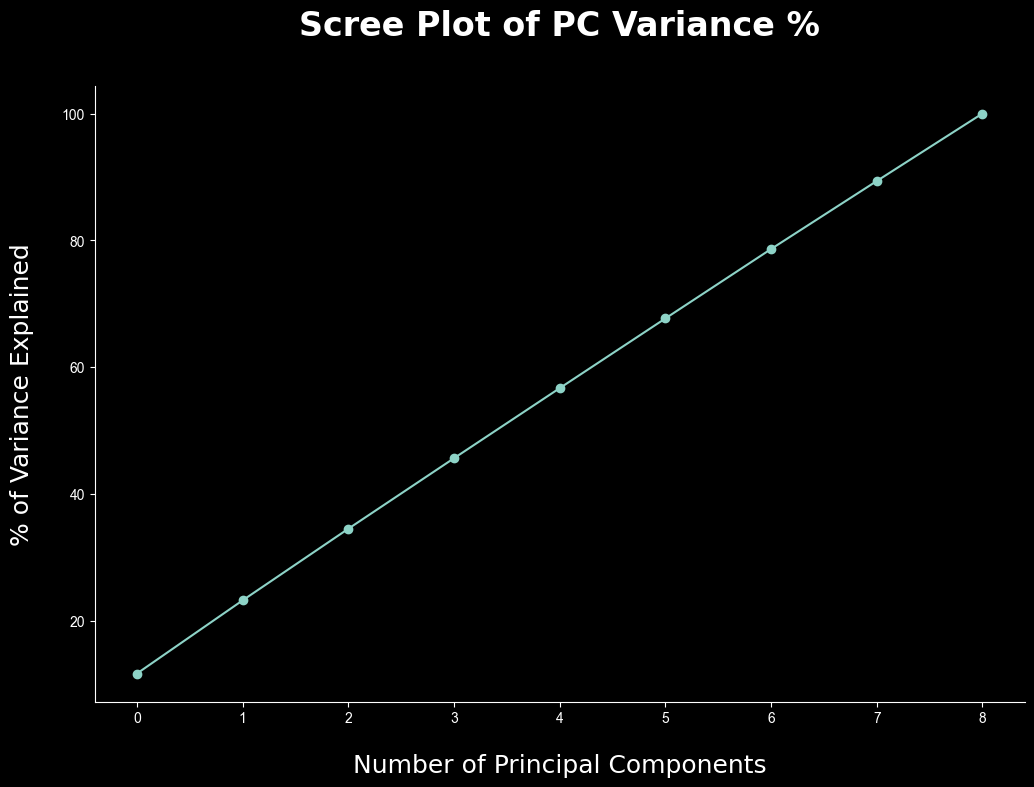

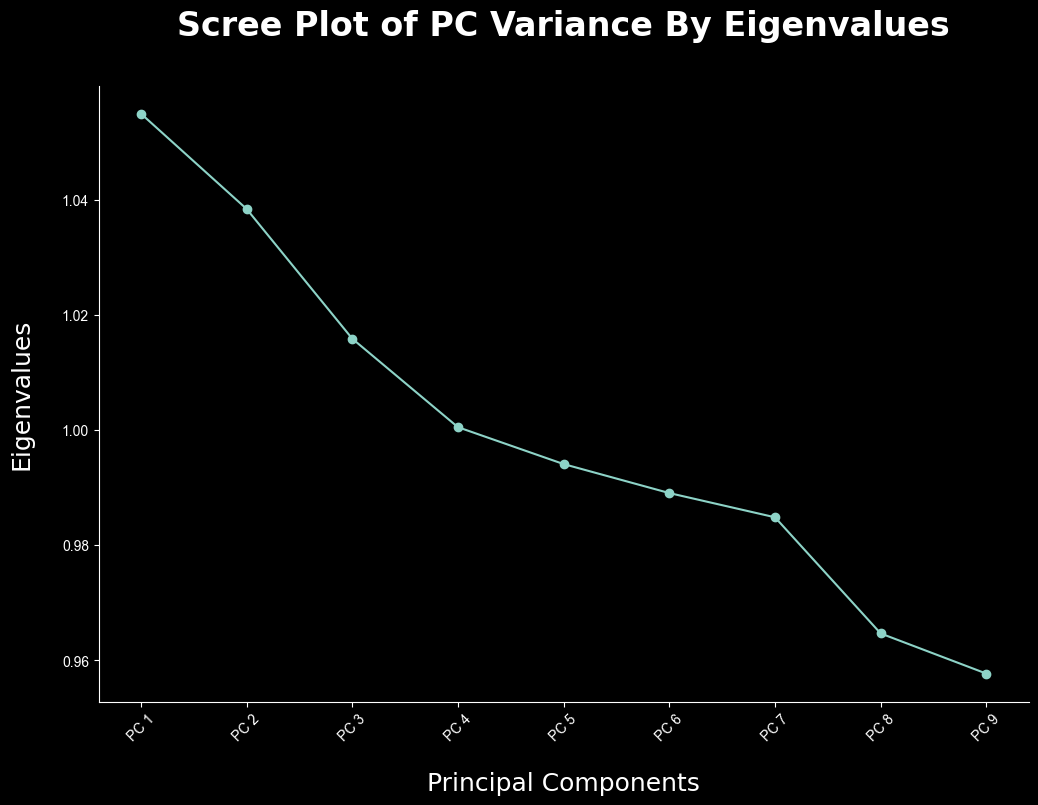

In [26]:
# Scree Plot Contribution Of Each PC To 100% Variance
with plt.style.context(['dark_background']):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.axes.grid(False)
    plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100, "o-")
    plt.title('Scree Plot of PC Variance %', family='Arial, sans-serif', fontweight='bold', fontsize=24, color='white', 
                     y=1.05, pad=14, horizontalalignment='center')
    plt.xlabel('Number of Principal Components', family='Arial, sans-serif', fontsize=18, color='white', labelpad=20)
    plt.ylabel('% of Variance Explained', family='Arial, sans-serif', fontsize=18, color='white', labelpad=20)
    plt.show()

# Scree Plot Variances By Eigenvalues
with plt.style.context(['dark_background']):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.axes.grid(False)
    y1 = np.std(pca.transform(s), axis=0)**2
    x1 = np.arange(len(y1)) + 1
    plt.plot(x1, y1, "o-")
    plt.xticks(x1, ['PC ' + str(i) for i in x1], rotation=45)
    plt.title('Scree Plot of PC Variance By Eigenvalues', family='Arial, sans-serif', fontweight='bold', fontsize=24, color='white', 
                     y=1.05, pad=14, horizontalalignment='center')
    plt.xlabel('Principal Components', family='Arial, sans-serif', fontsize=18, color='white', labelpad=20)
    plt.ylabel('Eigenvalues', family='Arial, sans-serif', fontsize=18, color='white', labelpad=20)
    plt.show()

Ideally, if the first few principal components account for a large portion of the variance in the data, it may be possible to reduce the dataset to just two features, which would be beneficial for data visualization.

However, in some cases, the first few principal components may not account for a significant portion of the data's variance. For example, in this particular case, the first four principal components only account for a small portion of the data's variance. Specifically, the first two principal components account for 12% of the variance, while PC's 3-4 account for 11%. This indicates that reducing the dataset to just two features may not be possible or practical.

Nonetheless, the next few principal components, PC's 3-7, are still significant and worth including in the dataset as they account for 10-11% of the variance each. On the other hand, PC's 8-9 are less significant and contribute less to the dataset's variance. The aim of PCA is to exclude certain principal components that do not significantly contribute to the dataset's variance, as they can be considered noise.

Based on the analysis of the charts and table, it appears that this dataset may not be suitable for PCA as all the principal components fall within the 10-12% range. The scree plot, which shows the eigenvalues of each principal component, indicates a dip after PC7, suggesting that the last two components (PC8-9) can be removed to create the final dataset with only PC's 1-7. This approach would retain the most significant principal components, which can still provide valuable insights into the dataset.

<a id="#PartD3"></a>
## <span style="color:green">D3: Principle Component Variance</span>

To reflect the changes in the number of components used in the analysis, the PCA process from part D1 was repeated with only 7 components.

In [27]:
# Instantiate Final PCA Object
final_pca = PCA(n_components = 7, random_state = 42)

# Fit PCA To Standardized Data & Transform
final_pca.fit(s)
final_df_pca = final_pca.transform(s)

# Generate Final PCA Maxtrix
final_df_pca_matrix = pd.DataFrame(final_pca.components_.T, 
                              columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"], 
                              index = cols)
round(final_df_pca_matrix,3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
children,0.561,-0.037,0.285,-0.015,0.104,0.309,-0.151
age,-0.531,0.242,-0.241,-0.123,-0.147,0.395,0.075
income,0.178,0.271,-0.000,0.817,-0.133,0.321,-0.079
outage_sec_wk,-0.182,-0.282,0.716,-0.007,0.229,-0.013,-0.009
email,-0.005,-0.497,-0.234,-0.142,0.238,0.708,-0.090
contacts,-0.443,-0.099,0.039,0.452,0.560,-0.074,0.151
yr_equip_failure,0.042,0.492,0.340,-0.223,0.086,0.328,0.609
tenure,-0.212,0.468,0.192,-0.178,0.187,0.099,-0.749
monthly_charge,-0.308,-0.264,0.374,0.104,-0.696,0.146,-0.061


Using the same code as in part D2, we verified the variance accounted for by each of the remaining seven components after removing PC8 and PC9.

In [28]:
# Generate Table For Contribution & Cumulative Percentage
final_pc_contributions = list(final_pca.explained_variance_ratio_)
final_pc_names = list(final_df_pca_matrix.columns)

final_pca_list = []
final_cumulative = 0

# Mean and Standard Deviation For 7 Features
for i in range(len(final_pc_names)):
        final_pca_dic = {}
        final_pca_dic['PC'] = final_pc_names[i]
        final_pca_dic['Contribution'] = final_pc_contributions[i] * 100
        final_pca_dic['Contribution %'] = Decimal(final_pca_dic['Contribution']).quantize(Decimal('1.00'), rounding=ROUND_DOWN)
        final_cumulative = final_pca_dic['Contribution %'] + final_cumulative
        final_pca_dic['Cumulative %'] = final_cumulative
        final_pca_list.append(final_pca_dic)
final_c = pd.DataFrame(final_pca_list, columns=['PC', 'Contribution %', 'Cumulative %'])
final_c = final_c.style.set_properties(**{'text-align': 'center'})
final_f_pca = final_c.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'center')])])

display(final_f_pca.hide_index())
print('7 Principal Components Explain {:.2f}& of Variance'.format(final_pca_dic['Cumulative %']))

PC,Contribution %,Cumulative %
PC1,11.72,11.72
PC2,11.53,23.25
PC3,11.28,34.53
PC4,11.11,45.64
PC5,11.04,56.68
PC6,10.98,67.66
PC7,10.94,78.60


7 Principal Components Explain 78.60& of Variance


<a id="#PartD4"></a>
## <span style="color:green">D4: Total Principle Component Variance</span>

In [29]:
print('7 Principal Components Explain {:.2f}% of Variance'.format(final_pca_dic['Cumulative %']))

7 Principal Components Explain 78.60% of Variance


<a id="#PartD5"></a>
## <span style="color:green">D5: Summary of PCA Analysis</span>

After completing the PCA process, we can split the final dataset into training and testing sets with a ratio of 80:20. To maintain the proportions of the data across the split, we will use the stratify method for the splitting. This will allow for classification and further analysis of the data.

In [30]:
# Split Data Into Training and Testing Sets, 80% Train, 20% Test, Stratify
X_train, X_test, y_train, y_test = train_test_split(final_df_pca, y, train_size = 0.8, test_size=0.2, random_state = 42, stratify = y)

# Verify Shape Of Datasets
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

Train: (8000, 7)
Test: (2000, 7)


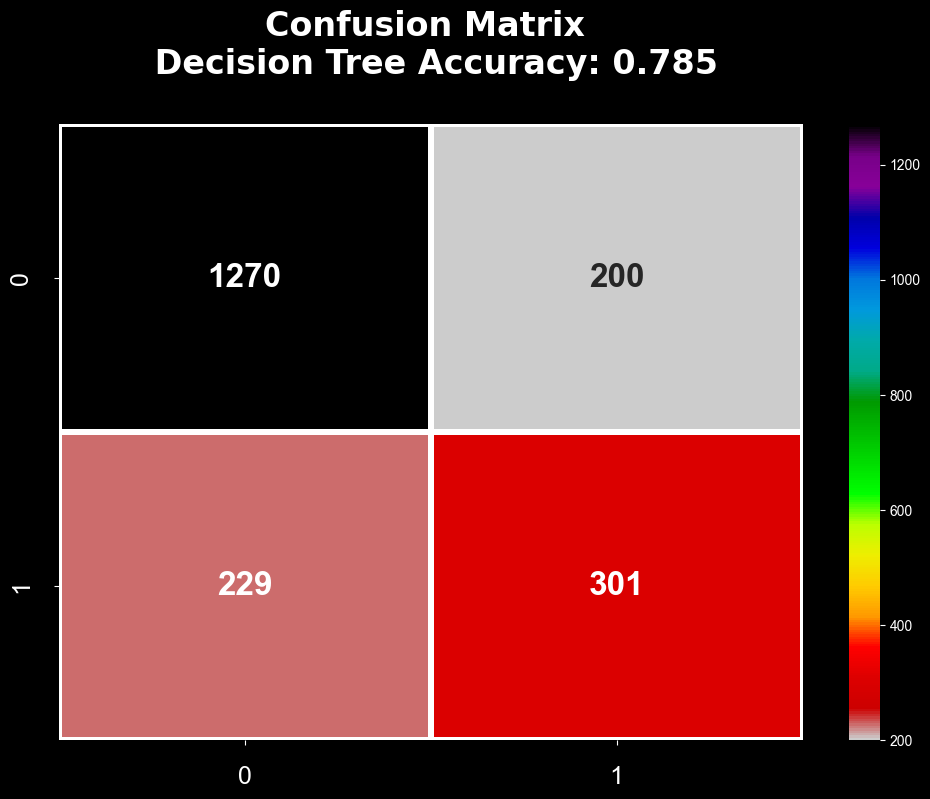

In [31]:
# Instantiate Classification Model
classification_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_predictions = classification_model.predict(X_test)

# Generate Accuracy Report
test_accuracy = accuracy_score(y_test, y_predictions)

# Predict Test Set Probabilities Of Positive Class
y_pred_proba = classification_model.predict_proba(X_test)[:,1]

with plt.style.context(['dark_background']):
    confusion = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_predictions),
                    index=range(2),columns=range(2))
    fig, ax = plt.subplots(figsize=(12,8))
    ax = sns.heatmap(
            confusion, square = False, annot = True, annot_kws={'size': 24, 'weight' : 'bold'}, 
            cmap='nipy_spectral_r', linewidths=3, linecolor='white', fmt='g')
    plt.tick_params(axis='both', labelsize=18, pad=15)
    plt.title('Confusion Matrix \n Decision Tree Accuracy: {:.3f}'.format(test_accuracy), family='Arial, sans-serif', fontweight='bold', fontsize=24, color='white', 
              y=1.05, pad=14, horizontalalignment='center')
    plt.xlabel("", family='Arial, sans-serif', fontsize=18, color='white', labelpad=20)
    plt.ylabel("", family='Arial, sans-serif', fontsize=18, color='white', labelpad=20)

        
    plt.show()
    

This classification model, based solely on 7 principal components generated by the PCA, did better than expected with an accuracy of 79%. The model correctly predicted churn/not-churn for 1571 (1270 + 301) customers and was incorrect on 429 customers (229 + 200).

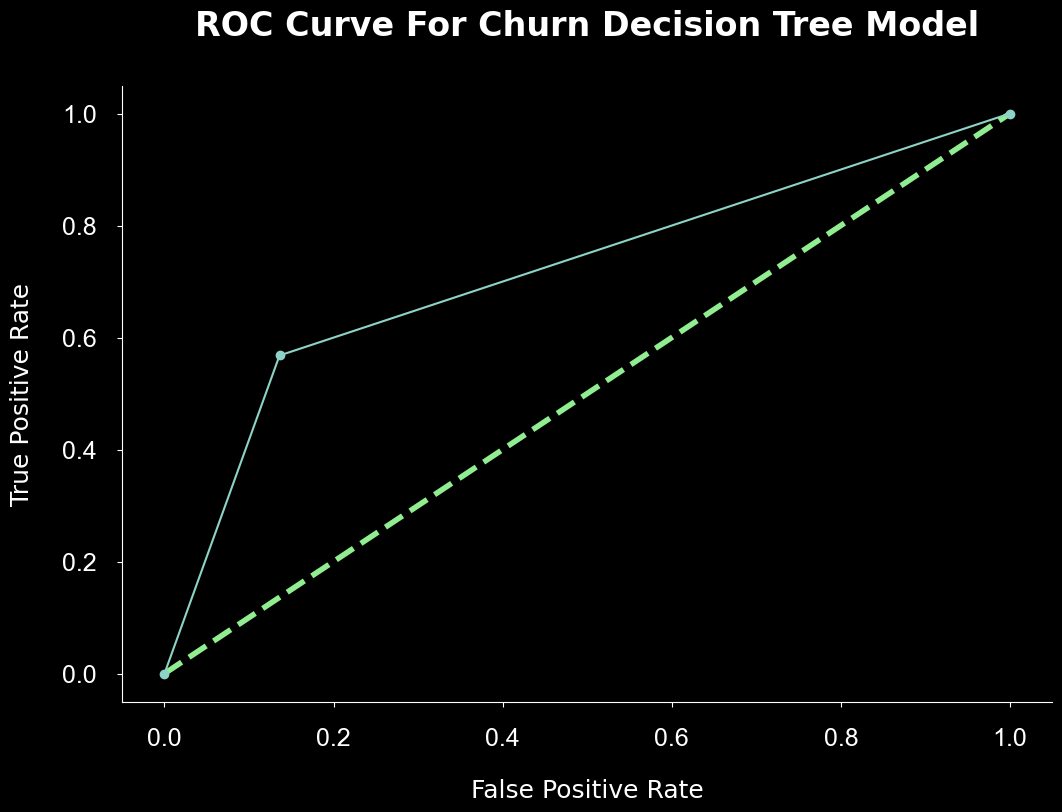

Area Under Curve (AUC) Score: 0.7159350532665896


In [32]:
# Generate ROC Plot w/ AUC Score 
with plt.style.context(['dark_background']):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    fig, ax = plt.subplots(figsize=(12,8))
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.axes.grid(False)
    plt.plot([0, 1], [0, 1], 'k--', lw=4, color='lightgreen')
    plt.plot(fpr, tpr, "o-")
    plt.tick_params(axis='both', labelsize=18, pad=15)
    plt.title('ROC Curve For Churn Decision Tree Model', family='Arial, sans-serif', fontweight='bold', fontsize=24, color='white', 
              y=1.05, pad=14, horizontalalignment='center')
    plt.xlabel('False Positive Rate', family='Arial, sans-serif', fontsize=18, color='white', labelpad=20)
    plt.ylabel('True Positive Rate', family='Arial, sans-serif', fontsize=18, color='white', labelpad=20)

    plt.show()

# ROC_AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Area Under Curve (AUC) Score: {roc_auc}')

The graph used to evaluate the classification model has a center diagonal line representing the expected classification performance if done randomly. The model's performance is plotted on this graph, with a curve below the diagonal line indicating a poor prediction rate, and a curve above it indicating a good prediction rate. The Area Under the Curve (AUC) score is the percentage of the graph's area beneath the model's curve. 

To prepare the dataset for analysis, continuous variables were standardized, generating a covariance matrix that allowed for easy comparison of the covariances between each pair of features. After creating a color-coded covariance matrix, it was discovered that 'bandwidth_yr' and 'tenure' were highly correlated, and only one of the features was required for analysis. Instead of dropping the feature from the dataset, a new dataset was created, re-standardized, and re-verified to have a mean of zero and a standard deviation of one. After data preparation, the clean and prepared dataset was exported as a CSV file. 

For the analysis, a principal component matrix was generated by instantiating a PCA object, fitting the PCA to the standardized data, and then transforming it. This step was repeated twice after determining that PC 8-9 did not significantly contribute to the total variance, based on the elbow chart generated in section D2. The principal components in the final dataset were reduced to the variables listed below, which explained 78.60% of the total variance. 

In the final part of the analysis, a training and testing data set was utilized by a classification model (Decision Tree) to determine if PCA was effective in reducing the dimensionality of the dataset with principal components that could accurately predict if a customer would churn. Overall, the classification model surprisingly performed well with a 79% prediction accuracy, given the final dataset consisted of only 7 components with 9 features. Furthermore, the model had an AUC Score of 0.716, indicating it is effective at predicting whether a customer will churn. The model could have possibly been reduced to 4 principal components, given 8 of 9 features are in PC1 - PC4, but that would have only explained 46% of the variance and wouldn't be able to accurately predict customer churn.

The following were the 7 principal components used by the classification model:

<ul class="a">
<li><b>PC1:</b> children, age, contacts</li>
<li><b>PC2:</b> email, yr_equip_failure, tenure</li>
<li><b>PC3:</b> outage_sec_wk</li> 
<li><b>PC4:</b> income, contacts</li>
<li><b>PC5:</b> contacts, monthly_charge</li> 
<li><b>PC6:</b> email</li> 
<li><b>PC5:</b> contacts, monthly_charge</li>
<li><b>PC7:</b> yr_equip_failure, tenure</li> 
</ul>

 

## Part V: Attachments

<a id="#PartE"></a>
## <span style="color:green">E: Third-Party Code</span>

```
Wasnik, A. (2020, October 19). Principal Component Analysis from Scratch in Python - AskPython. AskPython. 
    https://www.askpython.com/python/examples/principal-component-analysis

Towards AI Editorial Team. (2021, December 16). Principal Component Analysis (PCA) with Python Examples — Tutorial. Medium. 
    https://pub.towardsai.net/principal-component-analysis-pca-with-python-examples-tutorial-67a917bae9aa

```
<a id="#PartF"></a>
## <span style="color:green">F: Sources</span>

```
Lamberti, W. F. (2023, January 1). An overview of explainable and interpretable AI. Elsevier eBooks. 
    https://www.sciencedirect.com/topics/mathematics/scree-plot

Chouinard, J. (2022). PCA: Principal Component Analysis using Python (Scikit-learn). JC Chouinard. 
    https://www.jcchouinard.com/pca-with-python/

A Step-By-Step Complete Guide to Principal Component Analysis | PCA for Beginners. (2022). www.turing.com. 
    https://www.turing.com/kb/guide-to-principal-component-analysis

Jaadi, Z. (2021). A Step-by-Step Explanation of Principal Component Analysis (PCA). Built In. 
    https://builtin.com/data-science/step-step-explanation-principal-component-analysis
```